In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("diabetes.csv")

In [47]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
# # df.drop('Pregnancies',axis=1,inplace=True)
# def fillfunction(a,b,c):
#     for i in range(len(list(b[c]))):
#         if b[c].iloc[i]==0:
#             b[c].iloc[i]=a
        
# fillfunction(df['Glucose'].mean(),df,'Glucose')
# fillfunction(df['BloodPressure'].mean(),df,'BloodPressure')
# fillfunction(df['SkinThickness'].mean(),df,'SkinThickness')
# fillfunction(df['Insulin'].mean(),df,'Insulin')
# fillfunction(df['BMI'].mean(),df,'BMI')

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(df.drop('Outcome',axis=1))
df2 = scaler.transform(df.drop('Outcome',axis=1))

In [52]:
df2

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [53]:
df2 = pd.DataFrame(df2,columns=df.drop('Outcome',axis=1).columns)

In [60]:
df3 = df2.loc[~(df2[df2.columns[:-1]]==0).any(axis=1)]
df3['Outcome'] = df['Outcome']
# df2['Outcome'] = df['Outcome']
# df3 = df2

In [61]:
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [62]:
df3.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,-0.162456,-0.341594,-0.047638,-0.054728,-0.095577,-0.214288,-0.127275,-0.174505
1,0.303090,0.637302,0.088877,0.102104,0.178315,0.399790,0.237453,0.325569


In [63]:
df3.groupby('Outcome').agg({'Glucose':"mean"})

,Glucose
Outcome,
0,-0.341594
1,0.637302


In [64]:
df3.groupby('Outcome').agg({'Glucose':"mean",'BMI':"median",'Age':'mean'})

,Glucose,BMI,Age
Outcome,,,
0,-0.341594,-0.246551,-0.174505
1,0.637302,0.286510,0.325569


In [65]:
df3.groupby('Outcome').agg(['mean','median'])

Pregnancies             Glucose           BloodPressure            \
               mean    median      mean    median          mean    median   
Outcome                                                                     
0         -0.162456 -0.547919 -0.341594 -0.434859     -0.047638  0.046245   
1          0.303090  0.046014  0.637302  0.597947      0.088877  0.253036   

        SkinThickness             Insulin                 BMI            \
                 mean    median      mean    median      mean    median   
Outcome                                                                   
0           -0.054728  0.029077 -0.095577 -0.354258 -0.214288 -0.246551   
1            0.102104  0.405445  0.178315 -0.692891  0.399790  0.286510   

        DiabetesPedigreeFunction                 Age            
                            mean    median      mean    median  
Outcome                                                         
0                      -0.127275 -0.410363 -0.174505 -0.531023  
1                       0.237453 -0.069089  0.325569  0.234767

C:\Users\Surjeet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Surjeet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


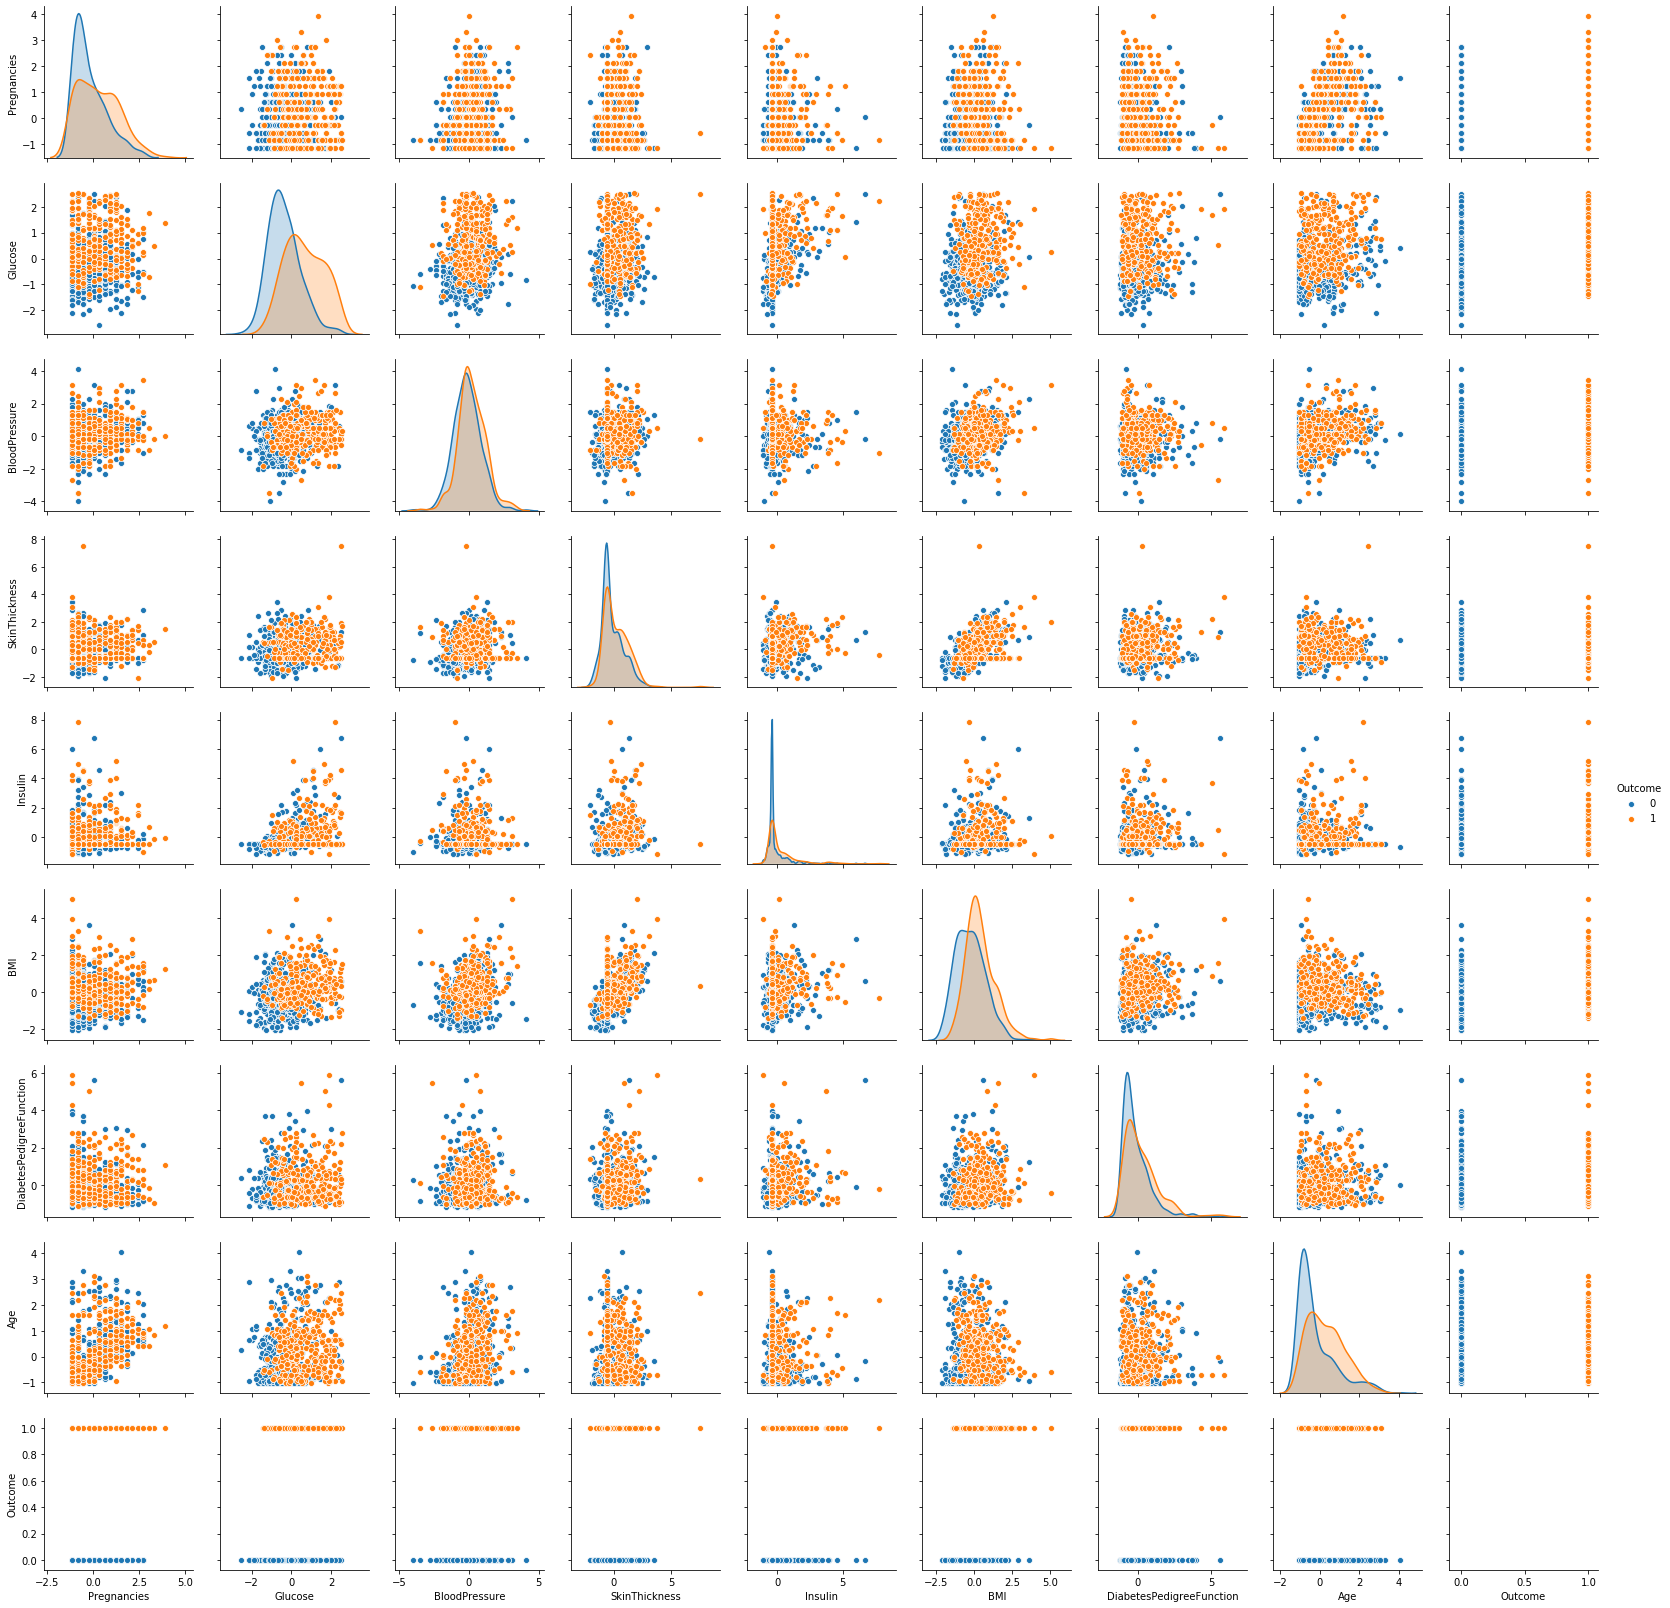

In [17]:
sns.pairplot(df3,hue='Outcome')

In [66]:
X = df3.drop('Outcome',axis=1)
y = df3['Outcome']

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
model = LogisticRegression()

In [70]:
model.fit(X_train,y_train)

C:\Users\Surjeet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
prediction = model.predict(X_test)

In [72]:
prediction

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       150
           1       0.74      0.60      0.67        81

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231

[[133  17]
 [ 32  49]]


In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
model2 = RandomForestClassifier()

In [77]:
model2.fit(X_train,y_train)

C:\Users\Surjeet\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
prediction2 = model2.predict(X_test)

In [79]:
print(classification_report(y_test,prediction2))
print(confusion_matrix(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.75      0.52      0.61        81

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.77      0.76       231

[[136  14]
 [ 39  42]]


In [80]:
from sklearn.svm import SVC

In [81]:
model3 = SVC()

In [82]:
model3.fit(X_train,y_train)

C:\Users\Surjeet\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [83]:
prediction3 = model3.predict(X_test)

In [84]:
print(classification_report(y_test,prediction3))
print(confusion_matrix(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       150
           1       0.75      0.58      0.65        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

[[134  16]
 [ 34  47]]


In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
grid_param = {'C':[1,10,100,110,120,130,140,300,500,600,700,800,900,1000,10000],'gamma':[1,0.1,0.01,0.001,0.0001,0.00001,0.000003,0.000001]}

In [87]:
grid = GridSearchCV(SVC(),grid_param,verbose=5)

In [88]:
grid.fit(X_train,y_train)

C:\Users\Surjeet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.661, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.654, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.669, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.761, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.788, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.719, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .........

[CV] .................. C=100, gamma=1e-05, score=0.652, total=   0.0s
[CV] C=100, gamma=3e-06 ..............................................
[CV] .................. C=100, gamma=3e-06, score=0.650, total=   0.0s
[CV] C=100, gamma=3e-06 ..............................................
[CV] .................. C=100, gamma=3e-06, score=0.654, total=   0.0s
[CV] C=100, gamma=3e-06 ..............................................
[CV] .................. C=100, gamma=3e-06, score=0.652, total=   0.0s
[CV] C=100, gamma=1e-06 ..............................................
[CV] .................. C=100, gamma=1e-06, score=0.650, total=   0.0s
[CV] C=100, gamma=1e-06 ..............................................
[CV] .................. C=100, gamma=1e-06, score=0.654, total=   0.0s
[CV] C=100, gamma=1e-06 ..............................................
[CV] .................. C=100, gamma=1e-06, score=0.652, total=   0.0s
[CV] C=110, gamma=1 ..................................................
[CV] .

[CV] .................... C=130, gamma=0.1, score=0.694, total=   0.0s
[CV] C=130, gamma=0.1 ................................................
[CV] .................... C=130, gamma=0.1, score=0.732, total=   0.0s
[CV] C=130, gamma=0.1 ................................................
[CV] .................... C=130, gamma=0.1, score=0.640, total=   0.0s
[CV] C=130, gamma=0.01 ...............................................
[CV] ................... C=130, gamma=0.01, score=0.733, total=   0.0s
[CV] C=130, gamma=0.01 ...............................................
[CV] ................... C=130, gamma=0.01, score=0.777, total=   0.0s
[CV] C=130, gamma=0.01 ...............................................
[CV] ................... C=130, gamma=0.01, score=0.736, total=   0.0s
[CV] C=130, gamma=0.001 ..............................................
[CV] .................. C=130, gamma=0.001, score=0.739, total=   0.0s
[CV] C=130, gamma=0.001 ..............................................
[CV] .

[CV] .................. C=300, gamma=1e-05, score=0.687, total=   0.0s
[CV] C=300, gamma=1e-05 ..............................................
[CV] .................. C=300, gamma=1e-05, score=0.685, total=   0.0s
[CV] C=300, gamma=3e-06 ..............................................
[CV] .................. C=300, gamma=3e-06, score=0.650, total=   0.0s
[CV] C=300, gamma=3e-06 ..............................................
[CV] .................. C=300, gamma=3e-06, score=0.654, total=   0.0s
[CV] C=300, gamma=3e-06 ..............................................
[CV] .................. C=300, gamma=3e-06, score=0.652, total=   0.0s
[CV] C=300, gamma=1e-06 ..............................................
[CV] .................. C=300, gamma=1e-06, score=0.650, total=   0.0s
[CV] C=300, gamma=1e-06 ..............................................
[CV] .................. C=300, gamma=1e-06, score=0.654, total=   0.0s
[CV] C=300, gamma=1e-06 ..............................................
[CV] .

[CV] .................... C=700, gamma=0.1, score=0.711, total=   0.1s
[CV] C=700, gamma=0.1 ................................................
[CV] .................... C=700, gamma=0.1, score=0.737, total=   0.1s
[CV] C=700, gamma=0.1 ................................................
[CV] .................... C=700, gamma=0.1, score=0.607, total=   0.1s
[CV] C=700, gamma=0.01 ...............................................
[CV] ................... C=700, gamma=0.01, score=0.722, total=   0.1s
[CV] C=700, gamma=0.01 ...............................................
[CV] ................... C=700, gamma=0.01, score=0.771, total=   0.1s
[CV] C=700, gamma=0.01 ...............................................
[CV] ................... C=700, gamma=0.01, score=0.753, total=   0.1s
[CV] C=700, gamma=0.001 ..............................................
[CV] .................. C=700, gamma=0.001, score=0.739, total=   0.0s
[CV] C=700, gamma=0.001 ..............................................
[CV] .

[CV] .................. C=900, gamma=1e-05, score=0.719, total=   0.0s
[CV] C=900, gamma=3e-06 ..............................................
[CV] .................. C=900, gamma=3e-06, score=0.700, total=   0.0s
[CV] C=900, gamma=3e-06 ..............................................
[CV] .................. C=900, gamma=3e-06, score=0.665, total=   0.0s
[CV] C=900, gamma=3e-06 ..............................................
[CV] .................. C=900, gamma=3e-06, score=0.680, total=   0.0s
[CV] C=900, gamma=1e-06 ..............................................
[CV] .................. C=900, gamma=1e-06, score=0.650, total=   0.0s
[CV] C=900, gamma=1e-06 ..............................................
[CV] .................. C=900, gamma=1e-06, score=0.654, total=   0.0s
[CV] C=900, gamma=1e-06 ..............................................
[CV] .................. C=900, gamma=1e-06, score=0.652, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   11.7s finished
C:\Users\Surjeet\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 110, 120, 130, 140, 300, 500, 600,
                               700, 800, 900, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 3e-06,
                                   1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [89]:
grid.best_params_

{'C': 130, 'gamma': 0.0001}

In [90]:
grid.best_estimator_

SVC(C=130, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
pred4 = grid.predict(X_test)

In [44]:
print(classification_report(y_test,pred4))
print(confusion_matrix(y_test,pred4))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       150
           1       0.74      0.52      0.61        81

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.77      0.75       231

[[135  15]
 [ 39  42]]


In [45]:
48/231

0.2077922077922078